# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
from multi_ddpg_agent import MultiAgent

Using cpu as device!


In [2]:
torch.cuda.is_available()

False

In [3]:
import torch
print(torch.__version__)
print(torch.version.cuda)

1.10.2+cpu
None


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [4]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [7]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.09000000171363354
Score (max over agents) from episode 5: 0.09000000171363354


When finished, you can close the environment.

In [ ]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [ ]:
# Create agent
agent = MultiAgent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=2)

# Training parameters
n_episodes = 2000
max_t = 1000
print_every = 100
scores_window = deque(maxlen=100)
all_scores = []

for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    scores = np.zeros(num_agents)
    agent.reset()
    
    for t in range(max_t):
        actions = agent.act(states)                                # get actions
        env_info = env.step(actions)[brain_name]                   # step environment
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        agent.step(states, actions, rewards, next_states, dones)   # agent learns
        scores += rewards
        states = next_states
        if np.any(dones):
            break
    
    max_score = np.max(scores)
    scores_window.append(max_score)
    all_scores.append(max_score)
    
    print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}', end="")
    if i_episode % print_every == 0:
        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}')
    
    # Save model if performance is good enough
    if np.mean(scores_window) >= 0.5:
        print(f"\nEnvironment solved in {i_episode} episodes!\tAverage Score: {np.mean(scores_window):.2f}")
        torch.save(agent.agents[0].actor_local.state_dict(), '0_actor.pth')
        torch.save(agent.agents[0].critic_local.state_dict(), '0_critic.pth')
        torch.save(agent.agents[1].actor_local.state_dict(), '1_actor.pth')
        torch.save(agent.agents[1].critic_local.state_dict(), '1_critic.pth')
        break

# Close environment
env.close()

# Optionally plot scores
plt.plot(np.arange(1, len(all_scores)+1), all_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
import os
import json
from utils import create_next_id_folder

Successfully created directory: 'ddpg_trials\1'
Episode 2	Average Score: 0.00

c:\Users\ielhak\AppData\Local\anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 0.01
Episode 200	Average Score: 0.00
Episode 300	Average Score: 0.00
Episode 400	Average Score: 0.01
Episode 500	Average Score: 0.03
Episode 600	Average Score: 0.03
Episode 700	Average Score: 0.00
Episode 800	Average Score: 0.00
Episode 900	Average Score: 0.05
Episode 1000	Average Score: 0.06
Episode 1100	Average Score: 0.07
Episode 1200	Average Score: 0.09
Episode 1300	Average Score: 0.09
Episode 1400	Average Score: 0.09
Episode 1500	Average Score: 0.09
Episode 1600	Average Score: 0.05
Episode 1700	Average Score: 0.02
Episode 1800	Average Score: 0.05
Episode 1900	Average Score: 0.05
Episode 2000	Average Score: 0.04
Episode 2100	Average Score: 0.04
Episode 2200	Average Score: 0.04
Episode 2300	Average Score: 0.10
Episode 2400	Average Score: 0.08
Episode 2500	Average Score: 0.08
Episode 2600	Average Score: 0.09
Episode 2700	Average Score: 0.10
Episode 2800	Average Score: 0.09
Episode 2900	Average Score: 0.11
Episode 3000	Average Score: 0.10
Episode 3100	Averag

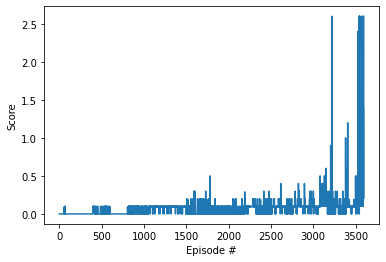

Successfully created directory: 'ddpg_trials\2'


c:\Users\ielhak\AppData\Local\anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.00
Episode 300	Average Score: 0.00
Episode 400	Average Score: 0.00
Episode 500	Average Score: 0.00
Episode 600	Average Score: 0.00
Episode 700	Average Score: 0.00
Episode 800	Average Score: 0.00
Episode 900	Average Score: 0.00
Episode 1000	Average Score: 0.00
Episode 1100	Average Score: 0.00
Episode 1200	Average Score: 0.01
Episode 1300	Average Score: 0.00
Episode 1400	Average Score: 0.01
Episode 1500	Average Score: 0.00
Episode 1600	Average Score: 0.04
Episode 1700	Average Score: 0.00
Episode 1800	Average Score: 0.00
Episode 1900	Average Score: 0.01
Episode 2000	Average Score: 0.02


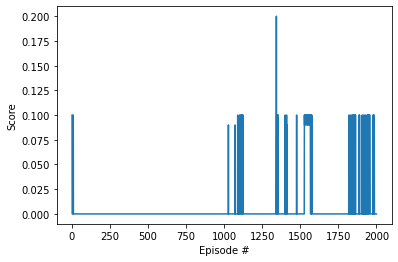

In [9]:
base_path = 'ddpg_trials'
combinations = [
    {
        "n_episodes" : 10000,  # Changed
        "max_t" : 1000,
        "buffer_size": int(1e6), 
        "batch_size": 128,
        "gamma": 0.99, 
        "tau": 1e-3, 
        "lr_actor": 1e-4, 
        "lr_critic": 1e-3,
    },
    {
        "n_episodes" : 2000, 
        "max_t" : 1000,
        "buffer_size": int(1e6), 
        "batch_size": 128,
        "gamma": 0.99, 
        "tau": 1e-3, 
        "lr_actor": 1e-4, 
        "lr_critic": 3e-3, # Changed
    },
 ]

for properties in combinations:
    new_path = create_next_id_folder(base_path)

    # Create agent
    agent = MultiAgent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0,
                       buffer_size=properties['buffer_size'],
                       batch_size=properties['batch_size'],
                       gamma=properties['gamma'],
                       tau=properties['tau'],
                       lr_actor=properties['lr_actor'],
                       lr_critic=properties['lr_critic'],
                       )

    # Training parameters
    n_episodes = properties['n_episodes']
    max_t = properties['max_t']
    print_every = 100
    scores_window = deque(maxlen=100)
    all_scores = []

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)                                # get actions
            env_info = env.step(actions)[brain_name]                   # step environment
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)   # agent learns
            scores += rewards
            states = next_states
            if np.any(dones):
                break
        
        max_score = np.max(scores)
        scores_window.append(max_score)
        all_scores.append(max_score)
        
        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}', end="")
        if i_episode % print_every == 0:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}')
        
        # Save model if performance is good enough
        if np.mean(scores_window) >= 0.5:
            print(f"\nEnvironment solved in {i_episode} episodes!\tAverage Score: {np.mean(scores_window):.2f}")
            torch.save(agent.actors_local[0].state_dict(), os.path.join(new_path, '0_actor.pth'))
            torch.save(agent.actors_local[1].state_dict(), os.path.join(new_path, '1_actor.pth'))            
            torch.save(agent.critic_local.state_dict(), os.path.join(new_path, 'critic.pth'))
            break

    # Close environment
    # env.close()

    with open(os.path.join(new_path, 'parameters.json'), 'w') as json_file:
        json.dump(properties, json_file,  indent=4)

    with open(os.path.join(new_path, 'scores.json'), 'w') as f:

        json.dump(all_scores, f, indent=4) # indent makes it human-readable

    torch.save(agent.actors_local[0].state_dict(), os.path.join(new_path, '0_actor.pth'))
    torch.save(agent.actors_local[1].state_dict(), os.path.join(new_path, '1_actor.pth'))
    torch.save(agent.critic_local.state_dict(), os.path.join(new_path, 'critic.pth'))
    # Optionally plot scores
    plt.plot(np.arange(1, len(all_scores)+1), all_scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

Successfully created directory: 'ddpg_trials\3'
Episode 1	Average Score: 0.00

c:\Users\ielhak\AppData\Local\anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.00
Episode 300	Average Score: 0.00
Episode 400	Average Score: 0.00
Episode 500	Average Score: 0.00
Episode 600	Average Score: 0.00
Episode 700	Average Score: 0.00
Episode 800	Average Score: 0.00
Episode 900	Average Score: 0.00
Episode 1000	Average Score: 0.00
Episode 1100	Average Score: 0.02
Episode 1200	Average Score: 0.01
Episode 1300	Average Score: 0.01
Episode 1400	Average Score: 0.01
Episode 1500	Average Score: 0.01
Episode 1600	Average Score: 0.00
Episode 1700	Average Score: 0.05
Episode 1800	Average Score: 0.16
Episode 1900	Average Score: 0.89
Episode 2000	Average Score: 1.84
Episode 2100	Average Score: 1.13
Episode 2200	Average Score: 0.98
Episode 2300	Average Score: 0.70
Episode 2400	Average Score: 1.74
Episode 2500	Average Score: 0.29
Episode 2600	Average Score: 1.12
Episode 2700	Average Score: 1.21
Episode 2800	Average Score: 0.96
Episode 2900	Average Score: 0.87
Episode 3000	Average Score: 0.00
Episode 3100	Averag

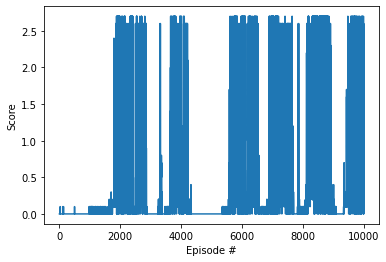

In [8]:
base_path = 'ddpg_trials'
combinations = [
    {
        "n_episodes" : 10000,  # Changed
        "max_t" : 1000,
        "buffer_size": int(1e6), 
        "batch_size": 256, # Changed
        "gamma": 0.99, 
        "tau": 1e-3, 
        "lr_actor": 1e-4, 
        "lr_critic": 1e-3,
    },
 ]

for properties in combinations:
    new_path = create_next_id_folder(base_path)

    # Create agent
    agent = MultiAgent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0,
                       buffer_size=properties['buffer_size'],
                       batch_size=properties['batch_size'],
                       gamma=properties['gamma'],
                       tau=properties['tau'],
                       lr_actor=properties['lr_actor'],
                       lr_critic=properties['lr_critic'],
                       )

    # Training parameters
    n_episodes = properties['n_episodes']
    max_t = properties['max_t']
    print_every = 100
    scores_window = deque(maxlen=100)
    all_scores = []

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)                                # get actions
            env_info = env.step(actions)[brain_name]                   # step environment
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)   # agent learns
            scores += rewards
            states = next_states
            if np.any(dones):
                break
        
        max_score = np.max(scores)
        scores_window.append(max_score)
        all_scores.append(max_score)
        
        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}', end="")
        if i_episode % print_every == 0:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}')
        
        # Save model if performance is good enough
        if np.mean(scores_window) >= 5.0:
            print(f"\nEnvironment solved in {i_episode} episodes!\tAverage Score: {np.mean(scores_window):.2f}")
            torch.save(agent.actors_local[0].state_dict(), os.path.join(new_path, '0_actor.pth'))
            torch.save(agent.actors_local[1].state_dict(), os.path.join(new_path, '1_actor.pth'))            
            torch.save(agent.critic_local.state_dict(), os.path.join(new_path, 'critic.pth'))
            break

    # Close environment
    # env.close()

    with open(os.path.join(new_path, 'parameters.json'), 'w') as json_file:
        json.dump(properties, json_file,  indent=4)

    with open(os.path.join(new_path, 'scores.json'), 'w') as f:

        json.dump(all_scores, f, indent=4) # indent makes it human-readable

    torch.save(agent.actors_local[0].state_dict(), os.path.join(new_path, '0_actor.pth'))
    torch.save(agent.actors_local[1].state_dict(), os.path.join(new_path, '1_actor.pth'))
    torch.save(agent.critic_local.state_dict(), os.path.join(new_path, 'critic.pth'))
    # Optionally plot scores
    plt.plot(np.arange(1, len(all_scores)+1), all_scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [11]:
from tqdm import tqdm

for k in range(1, 3):
    # load the weights from file
    models_path = f'ddpg_trials/{k}/'
    agent.actors_local[0].load_state_dict(torch.load(f'{models_path}0_actor.pth'))
    agent.actors_local[1].load_state_dict(torch.load(f'{models_path}1_actor.pth'))
    agent.critic_local.load_state_dict(torch.load(f'{models_path}critic.pth'))
    detailed_scores = []
    max_scores = []
    num_of_episodes = 100
    for i in tqdm(range(num_of_episodes)):
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment
        # state = env_info.vector_observations[0]            # get the current state

        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        agent.reset()

        done = False
        while not done:

            actions = agent.act(states)                                # get actions
            env_info = env.step(actions)[brain_name]                   # step environment
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)   # agent learns
            scores += rewards
            states = next_states

            if np.any(dones):
                break

        detailed_scores.append(list(scores))
        max_score = np.max(scores)
        max_scores.append(max_score)

    average_score = sum(scores) / len(scores)
    if average_score >= 0.5:
        print(f"PASSED! {models_path} achieved an average of {average_score} in {num_of_episodes} episodes.")
    else:
        print(f"{models_path} achieved an average of {average_score} in {num_of_episodes} episodes.")
    
    with open(os.path.join(f'ddpg_trials/{k}', 'test_scores.json'), 'w') as f:
        json.dump({
            "max_scores": max_scores,
            "detailed_scores": detailed_scores,
        }, f, indent=4) # indent makes it human-readable

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

c:\Users\ielhak\AppData\Local\anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
100%|██████████| 100/100 [02:46<00:00,  1.67s/it]

ddpg_trials/1/ achieved an average of -0.004999999888241291 in 100 episodes.


TypeError: Object of type 'ndarray' is not JSON serializable

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\ielhak\AppData\Local\anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
100%|██████████| 100/100 [6:52:48<00:00, 247.69s/it]   

PASSED! ddpg_trials/3/ achieved an average of 2.550000037997961 in 100 episodes.


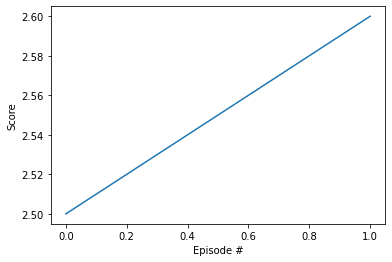

In [9]:
from tqdm import tqdm

for k in range(3, 4):
    # load the weights from file
    models_path = f'ddpg_trials/{k}/'
    agent.actors_local[0].load_state_dict(torch.load(f'{models_path}0_actor.pth'))
    agent.actors_local[1].load_state_dict(torch.load(f'{models_path}1_actor.pth'))
    agent.critic_local.load_state_dict(torch.load(f'{models_path}critic.pth'))
    detailed_scores = []
    max_scores = []
    num_of_episodes = 100
    for i in tqdm(range(num_of_episodes)):
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment
        # state = env_info.vector_observations[0]            # get the current state

        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        agent.reset()

        done = False
        while not done:

            actions = agent.act(states)                                # get actions
            env_info = env.step(actions)[brain_name]                   # step environment
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)   # agent learns
            scores += rewards
            states = next_states

            if np.any(dones):
                break

        detailed_scores.append(list(scores))
        max_score = np.max(scores)
        max_scores.append(max_score)

    average_score = sum(scores) / len(scores)
    if average_score >= 0.5:
        print(f"PASSED! {models_path} achieved an average of {average_score} in {num_of_episodes} episodes.")
    else:
        print(f"{models_path} achieved an average of {average_score} in {num_of_episodes} episodes.")
    
    with open(os.path.join(f'ddpg_trials/{k}', 'test_scores.json'), 'w') as f:
        json.dump({
            "max_scores": max_scores,
            "detailed_scores": detailed_scores,
        }, f, indent=4) # indent makes it human-readable

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

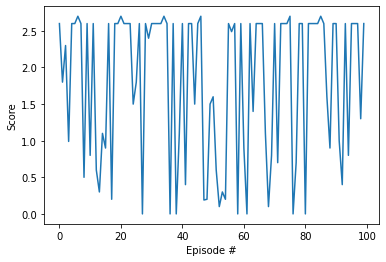

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(max_scores)), max_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

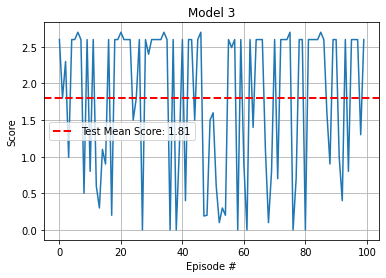

In [11]:
k = 3
fig = plt.figure()
ax = fig.add_subplot(111)
mean_y = np.mean(max_scores)
plt.plot(np.arange(len(max_scores)), max_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(f'Model {k}')
plt.axhline(mean_y, color='red', linestyle='--', linewidth=2, label=f'Test Mean Score: {mean_y:.2f}')
plt.legend()
plt.grid(True)
plt.show()

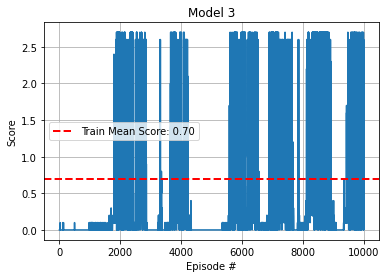

In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

k = 3
scores_path = os.path.join('ddpg_trials', str(k), "scores.json")
scores = []
with open(scores_path, 'r') as file:
    scores = json.load(file)

fig = plt.figure()
ax = fig.add_subplot(111)
mean_y = np.mean(scores)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(f'Model {k}')
plt.axhline(mean_y, color='red', linestyle='--', linewidth=2, label=f'Train Mean Score: {mean_y:.2f}')
plt.legend()
plt.grid(True)
plt.show()

Environment Solved at Step: 1774


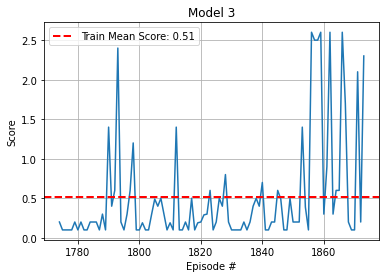

In [3]:
scores_window = deque(maxlen=100)  # last 100 scores

for i, score in enumerate(scores):
    if i >= 100 and np.mean(scores_window) > 0.5:
        print("Environment Solved at Step:", i - 100)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        mean_y = np.mean(scores_window)
        plt.plot(np.arange(i-100, i), scores_window)
        plt.ylabel('Score')
        plt.xlabel('Episode #')
        plt.title(f'Model {k}')
        plt.axhline(mean_y, color='red', linestyle='--', linewidth=2, label=f'Train Mean Score: {mean_y:.2f}')
        plt.legend()
        plt.grid(True)
        plt.show()
        break
    scores_window.append(score)